# Time Complexity Analysis With Python
### In this notebook, we’ll explore the concept of time complexity in a beginner-friendly way. We'll explore 6 types of algorithm complexity and implement each one in Python.

#### Import libraries

In [1]:
import numpy as np
import timeit
import random
import time
from matplotlib import pyplot as plt

In [2]:
def plot_time_complexity(arguments, func, n_rep=100):
  """
  Plots the time complexity of a function
  arguments: list with input values
  func: function to plot
  n_rep: number of times to run the function
  """
  # get the execution time of the function for different input sizes (n)  
  times = []
  for n in arguments:
    elapsed_time = timeit.timeit(lambda: func(n), number=n_rep)
    times.append(elapsed_time/n_rep)
      
  plt.figure(figsize=(10, 6))  
  plt.title("Time Complexity Analysis")
  plt.xlabel("Input size")
  plt.ylabel("Elapsed Time")
  plt.plot(arguments, times)
  plt.show()

In [8]:
def access_element(n):
    if n <= 0:
        return None  # Handle cases where n is zero or negative
    lst = [1]*n  # Create a list of size n
    return lst[0]  # Access the first element, which is a constant time operation

In [3]:
# example of a function with constant time complexity
def plus_one(n):
    res = n+1
    return res

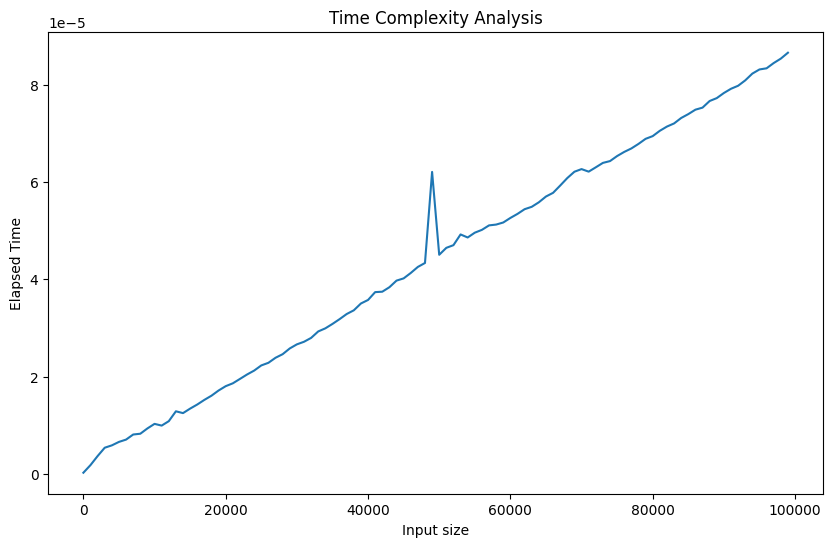

In [9]:
args = [x for x in range(1, 100000, 1000)]
plot_time_complexity(args, access_element, 1000)

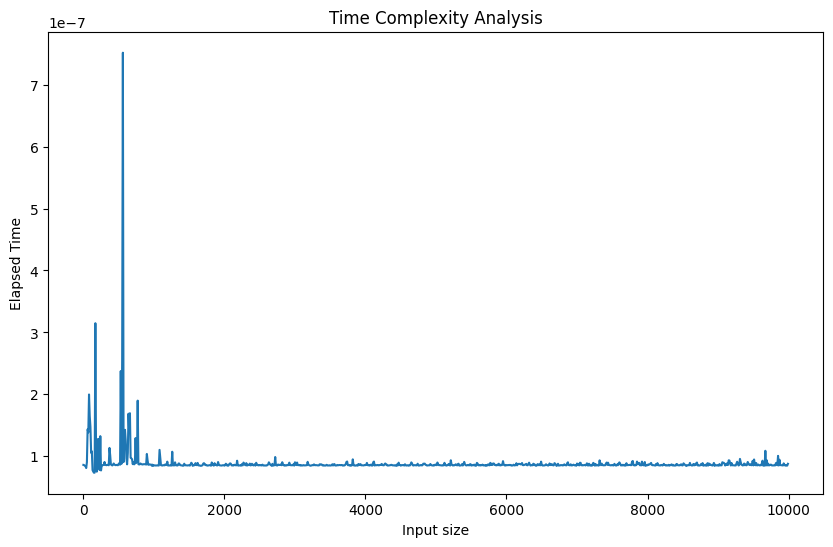

In [6]:
# plotting constant complexity
arguments = [x for x in range (1, 10000, 10)]
plot_time_complexity(arguments, plus_one, 10000)

In [7]:
# example of a function with linear time complexity
def linear_time(n):
    res = []
    for i in range(n):
        res.append(i)
    return random.choice(res)

In [8]:
linear_arguments = [x for x in range(1,10000, 100)]

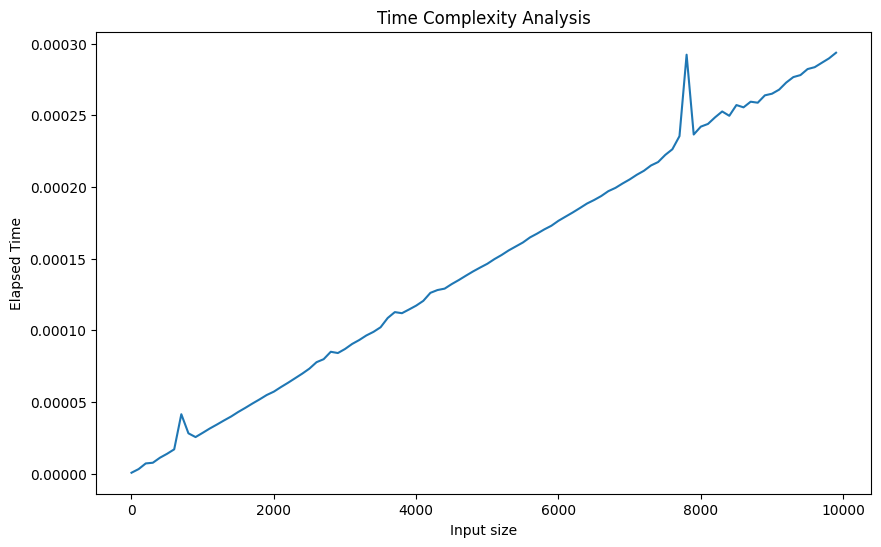

In [9]:
plot_time_complexity(linear_arguments, linear_time, 1000)

In [3]:
# example of a function with quadratic time complexity
def quadratic_time(n):
   res = []
   for i in range(n):
      for j in range(n):
         res.append(i+j)

In [4]:
def sum_of_int(n):
    total = 0
    # Outer loop runs from 1 to n
    for i in range(1, n + 1):
        # Inner loop runs from i to n
        for j in range(i, n + 1):
            # We add i to the total, effectively doing this i times
            total += i
    return total

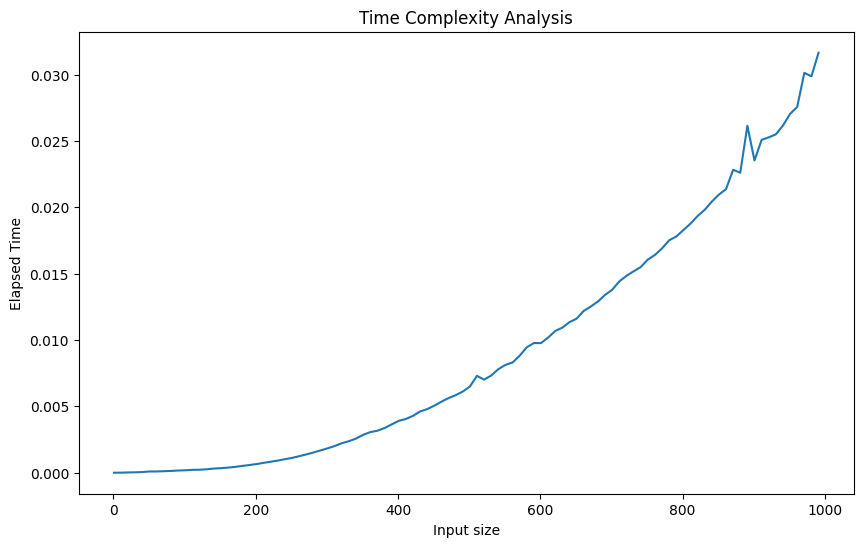

In [9]:
# plotting quadratic complexity
quadratic_arguments = [x for x in range(1,1000,10)]
plot_time_complexity(quadratic_arguments,quadratic_time, 50)

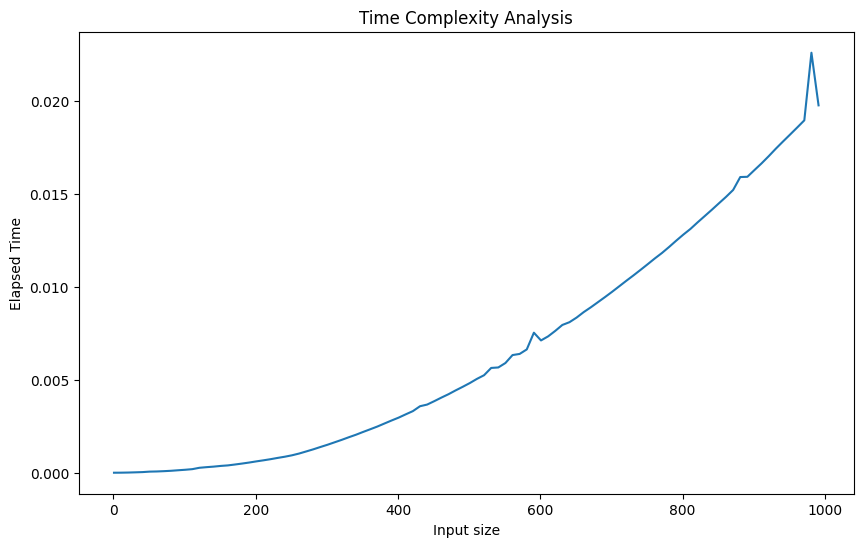

In [5]:
# plotting quadratic complexity
quadratic_arguments = [x for x in range(1,1000,10)]
plot_time_complexity(quadratic_arguments,sum_of_int, 50)

In [10]:
# example of a function with logarithmic time complexity
def log_time(n):
    res = []
    while n > 0:
        res.append(n)
        n = n // 2
    return res

In [6]:
def logarithmic_time_function(n):
    i = 1
    count = 0

    # Keep doubling i until it is greater than or equal to n
    while i < n:
        # Perform a constant time operation
        count += 1
        i *= 2

    return count

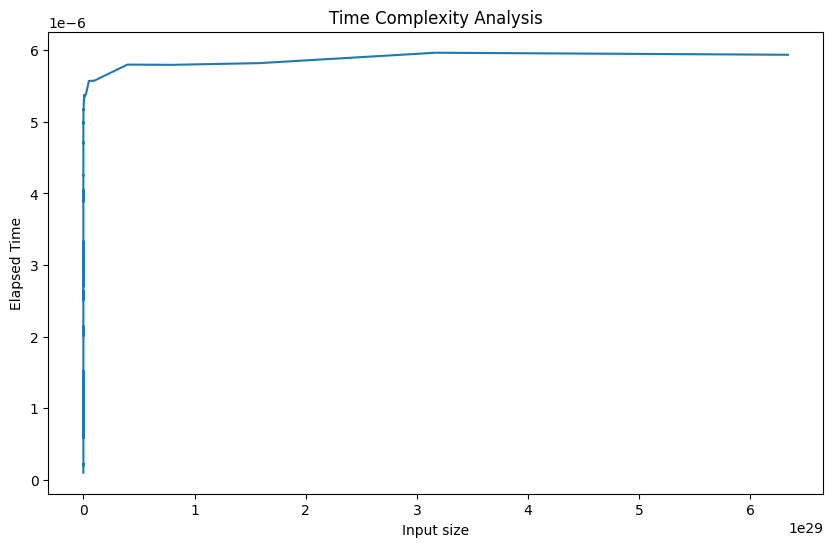

In [9]:
log_arguments = [(2**k -1) for k in range(1,100)]
plot_time_complexity(log_arguments, logarithmic_time_function, 1000)

In [23]:
# example of a function with linearithmic time complexity
def linearithmic_time(n):
    res = []
    for i in range(n):
        for j in range(i):
            res.append(j)
    return res

In [10]:
def merge_sort_simulation(n):
    def merge_sort_recursive(start, end):
        if start < end:
            # Find the midpoint
            mid = (start + end) // 2

            # Recursively split and sort the left half
            merge_sort_recursive(start, mid)

            # Recursively split and sort the right half
            merge_sort_recursive(mid + 1, end)

            # Merge the two halves (we don't actually perform the merge since this is a simulation)
    
    # Simulate sorting a conceptual array from 0 to n-1
    merge_sort_recursive(0, n - 1)

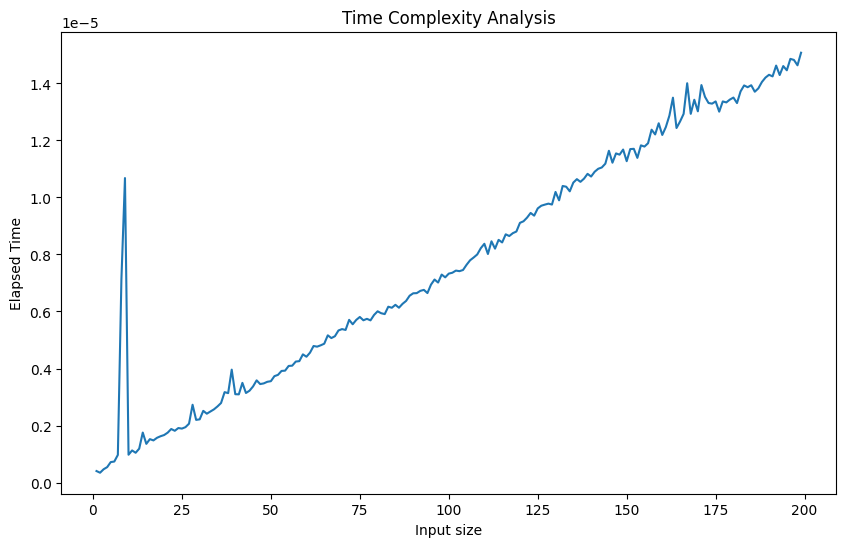

In [11]:
nlogn_arguments = [x for x in range(1,200,1)]
plot_time_complexity(nlogn_arguments, merge_sort_simulation, 1000)

In [12]:
# example of a function with exponential time complexity
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [16]:
exp_arguments = [x for x in range(1,50)]
plot_time_complexity(exp_arguments, fibonacci, 1)

In [13]:
start = time.perf_counter()
linear_time(10000)
end = time.perf_counter()
elapsed = end - start
elapsed

0.0004399169999942387

# Alternative function for plotting the time complexity of functions

In [105]:
# create a decorator for calculating the execution time of any function
def calculate_time(n_rep=100):
    def inner(func):
        def wrapper(*args, **kwargs):
            total_time = 0
            for t in range(n_rep):
                start = time.perf_counter()
                func(*args, **kwargs)
                end = time.perf_counter()
                elapsed_time = end - start
            total_time += elapsed_time
            return total_time/n_rep
        return wrapper
    return inner


In [126]:
@calculate_time(100000)
def constant_example(n):
    val = n * n
    return val

constant_example(10000)

1.249991328222677e-12

In [129]:
@calculate_time(1000)
def linear_time_example(n):
    lst = [1]*n
    for item in lst:
        return item

t = linear_time_example(1000)
t

1.5409987099701539e-09

In [111]:
def plot_time(input_sizes, func):
    time = []
    for size in input_sizes:
        elapsed_time = func(size)
        
        time.append(elapsed_time)

    plt.figure(figsize=(10, 6))  
    plt.title("Time Complexity Analysis")
    plt.xlabel("Input size")
    plt.ylabel("Elapsed Time")
    plt.plot(input_sizes, time)
    plt.show()

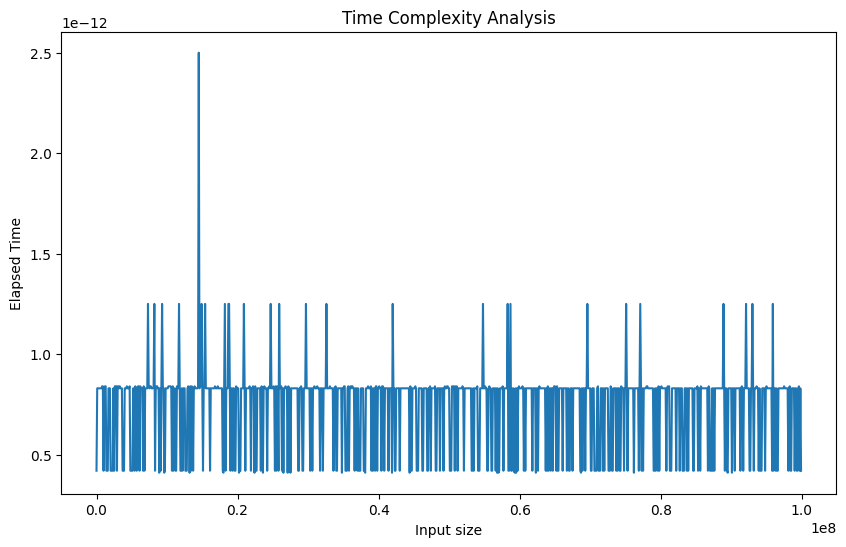

In [128]:
constant_inputs = [x for x in range(1, 100000, 100)]
plot_time(constant_inputs, constant_example)

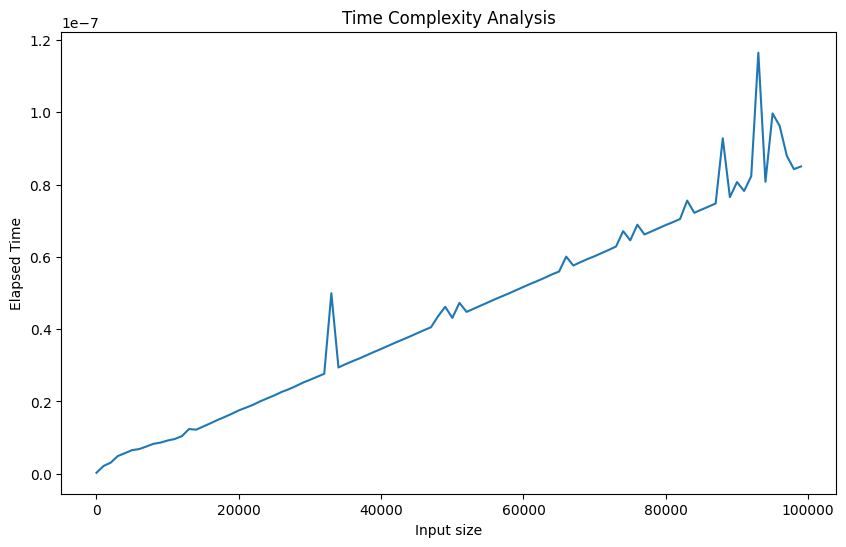

In [131]:
linear_inputs = [x for x in range(1, 100000, 1000)]
plot_time(linear_inputs, linear_time_example)

In [132]:
# Example function to be measured (Merge Sort)
@calculate_time(1000)
def merge_sort(n):
    import random

    arr = [random.randint(0, 100) for _ in range(n)]

    def merge_sort_helper(arr):
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2
        left_half = merge_sort_helper(arr[:mid])
        right_half = merge_sort_helper(arr[mid:])

        return merge(left_half, right_half)

    def merge(left, right):
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        result.extend(left[i:])
        result.extend(right[j:])
        
        return result

    sorted_arr = merge_sort_helper(arr)
    return sorted_arr

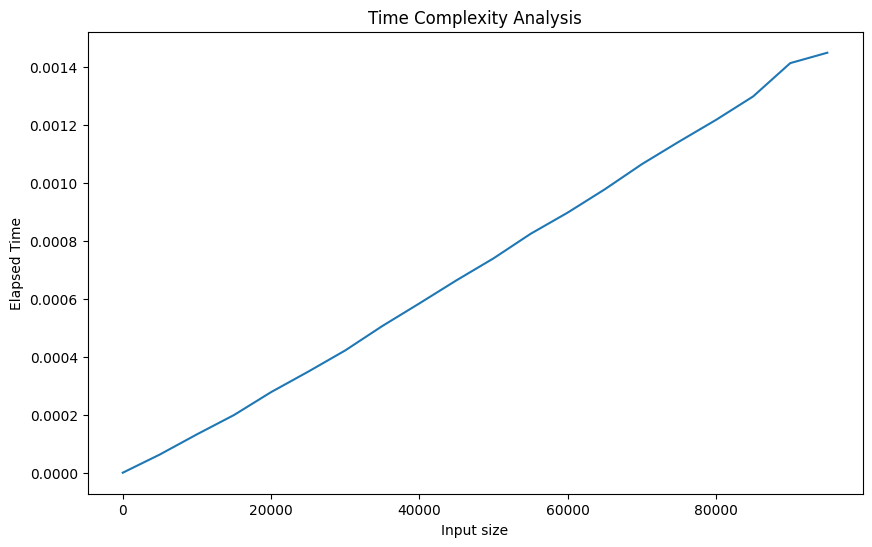

In [135]:
# Example usage
input_sizes = [x for x in range(1,100000,5000)]
plot_time(input_sizes, merge_sort)

In [154]:
# Example of logarithmic complexity function
@calculate_time(10000)
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

In [149]:
arr = [random.randint(1,500) for x in range(500)]
target = random.randint(1,500)

binary_search(arr, target)

9.169998520519585e-09

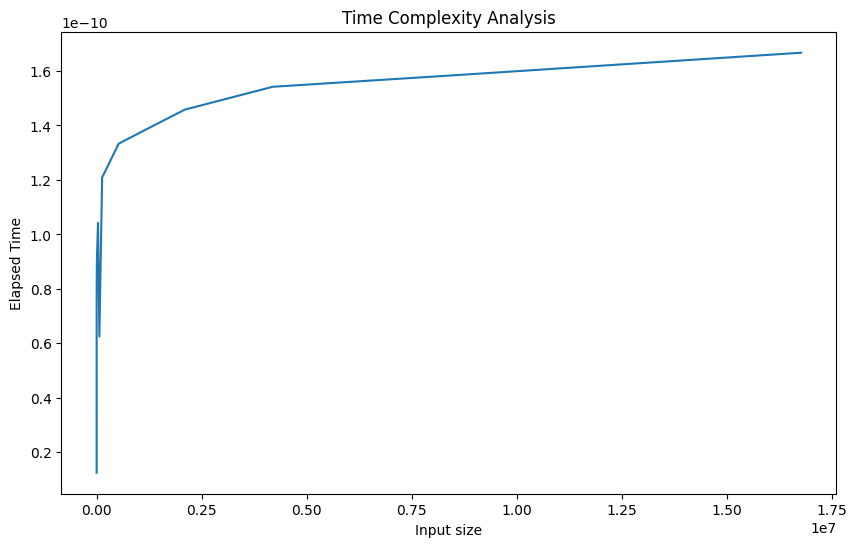

In [160]:
sizes = [(2**k - 1) for k in range(1,25)]
times = []
for size in sizes:
    arr = [random.randint(1,500) for x in range(size)]
    target = random.randint(1,500)
    elapsed = binary_search(arr,target)
    times.append(elapsed)
    
plt.figure(figsize=(10, 6))  
plt.title("Time Complexity Analysis")
plt.xlabel("Input size")
plt.ylabel("Elapsed Time")
plt.plot(sizes, times)
plt.show()

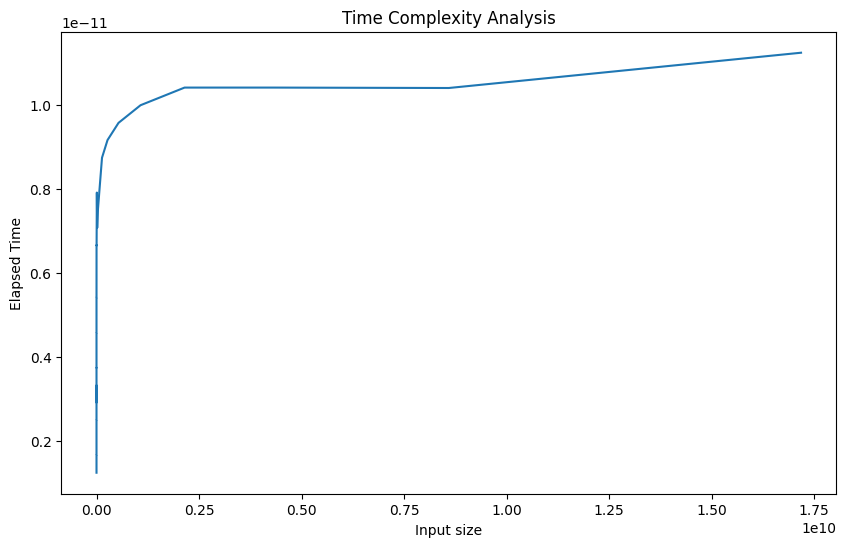

In [163]:
log_inputs = [(2**k - 1) for k in range(1,35)]

@calculate_time(100000)
def log_time(n):
    res = []
    while n > 0:
        res.append(n)
        n = n // 2
    return res

plot_time(log_inputs, log_time)